<a href="https://colab.research.google.com/github/lscblack/water_quality_model/blob/main/Kanisa's_version_water_portability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Kanisa's contribution/kanisa1)

# Data Preprocessing

In [30]:
# Preprocessing Part
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Load the data
df = pd.read_csv("water_potability.csv")

# 2. Inspect missing values
print("Missing values:\n", df.isnull().sum())

# 3. Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 4. Split features and target
X = df_imputed.drop("Potability", axis=1)
y = df_imputed["Potability"]

# 5. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=72)


Missing values:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


# Model Training

In [31]:
# Model Training Part
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# 1. Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# 2. Show the model summary
model.summary()

# 3. Compile the model using SGD
sgd = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# 4. Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 5. Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.15, callbacks=[early_stop], verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5759 - loss: 1.6690 - val_accuracy: 0.6005 - val_loss: 1.4674
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6192 - loss: 1.4066 - val_accuracy: 0.6107 - val_loss: 1.2626
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6074 - loss: 1.2261 - val_accuracy: 0.6310 - val_loss: 1.1088
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6310 - loss: 1.0793 - val_accuracy: 0.6310 - val_loss: 0.9936
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6411 - loss: 0.9591 - val_accuracy: 0.6438 - val_loss: 0.9074
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6483 - loss: 0.8834 - val_accuracy: 0.6463 - val_loss: 0.8449
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6791 - loss: 0.8098 - val_accuracy: 0.6514 - val_loss: 0.7968
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.7776 - val_accuracy: 0.6539 - 

# Evaluation

Train Accuracy: 0.686, Test Accuracy: 0.703
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model Performance on Test Set:
Accuracy  : 0.7027
F1 Score  : 0.5185
Recall    : 0.4102
Precision : 0.7047


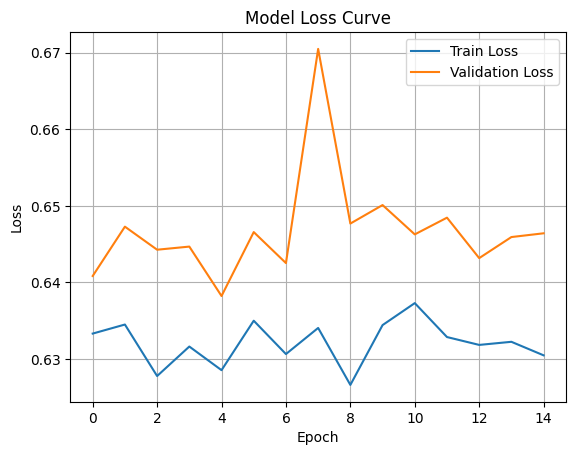

In [36]:
from matplotlib import pyplot as plt

# Fit the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_split=0.15,
    epochs=4000,
    verbose=0,
    callbacks=[early_stop]
)

# Evaluate the model on train and test sets
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)

print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Compute and print metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Model Performance on Test Set:")
print(f"Accuracy  : {acc:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"Precision : {precision:.4f}")


# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()



## ✅ Model Summary - Kanisa Rebecca Majok Thiak

| Train Instance               | Engineer Name              | Regularizer | Optimizer     | Early Stopping         | Dropout Rate | Accuracy | F1 Score | Recall | Precision |
| ---------------------------- | -------------------------- | ----------- | ------------- | ---------------------- | ------------ | -------- | -------- | ------ | --------- |
| water\_potability\_model\_v4 | Kanisa Rebecca Majok Thiak | L2 (0.01)   | SGD (lr=0.01) | Patience=10, val\_loss | 0.3 / 0.2    | 0.7027   | 0.5185   | 0.4102 | 0.7047    |

### 🔍 Notes and Rationale

* **Regularization (L2 - 0.01):**
  L2 regularization was applied to prevent overfitting by discouraging large weights in the model. It smooths the model by adding a penalty to the loss function, helping it generalize better to unseen data.

* **Optimizer (SGD with Learning Rate = 0.01):**
  I selected **Stochastic Gradient Descent (SGD)** for its interpretability and control over weight updates. While slower than Adam or RMSprop, SGD offers stable convergence and forces careful tuning of the learning rate, encouraging deeper understanding of the training dynamics.

* **Dropout Rates (0.3 and 0.2):**
  Dropout layers were added to reduce overfitting by randomly disabling neurons during training. A dropout rate of 0.3 after the first hidden layer and 0.2 after the second helped the model avoid reliance on specific paths through the network, improving robustness.

* **Early Stopping (Patience = 10, monitor = 'val\_loss'):**
  To prevent overfitting and unnecessary training epochs, early stopping was implemented. The model stopped training once the validation loss failed to improve for 10 consecutive epochs, ensuring training efficiency and better generalization.

* **Performance Interpretation:**
  An **accuracy of 70.27%** indicates that the model performs reasonably well in classifying water potability. The **F1 Score of 0.5185** suggests a balanced performance between precision and recall. However, the **recall (0.4102)** could be improved, as it indicates the model misses some positive cases. The **precision of 0.7047** shows that when the model predicts water as potable, it's often correct — an important metric in this health-related context.

